In [1]:
import numpy as np



class Melanie_Diamond():
    def loves(person):
        if person=='Gabe':
            return True

class Optimizer(Melanie_Diamond):
    #Fuck Josh Melander
    def __init__(self,num_neurons=50,alpha=3):
        self.P_nis = 1/alpha * np.eye(num_neurons)
        
    def update(self,weights,state,target):
        self.P_nis -= ( (self.P_nis @ state) @ (state.T @ self.P_nis)
                       / 1 + state.T @ self.P_nis @ state)
        weights -= (weights.T @ state - target) * (self.P_nis @ state)
        
        

        
def Target(x):
    return np.sin(x)

In [2]:
N=50
optim = Optimizer(num_neurons=N,alpha=3)

for i in range(1000):
    optim.update(np.random.rand(N),np.random.rand(N),1)

/Users/joshuamelander/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


In [3]:
np.ones((5,5)) @ np.ones((5,5))

array([[ 5.,  5.,  5.,  5.,  5.],
       [ 5.,  5.,  5.,  5.,  5.],
       [ 5.,  5.,  5.,  5.,  5.],
       [ 5.,  5.,  5.,  5.,  5.],
       [ 5.,  5.,  5.,  5.,  5.]])

In [4]:
# %matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure as ff
import numpy as np

In [5]:
from IPython.core.debugger import set_trace as bp

In [1]:
import numpy as np


def Target(x):
    #The function we're trying to fit
    scale = 2*np.pi/10
    return np.sin(scale*x)




class Optimizer():
    def __init__(self,num_neurons=50,alpha=3,dt=0.01):
        self.P = 1/alpha * np.eye(num_neurons)
        self.alpha = alpha
        self.eta = 2e-3
        self.gamma = 2
        self.dt = dt
        
    def update(self,weights,state,target):
        
#         error = (weights.T @ state - target)
#         weights -= error * (self.P @ state) / (1 + state.T @ self.P @ state)
#         self.P -= ( (self.P @ state) @ (state.T @ self.P)
#                     / (1 + state.T @ self.P @ state) )
        
        error = (weights.T @ state - target)
        weights -= self.eta * error * state
        self.eta += self.dt * self.eta * ( -self.eta + np.abs(error)**self.gamma )
        
        
        return weights, error
        

        
        
class Model():
    def __init__(self, n, tau = 1000000, t_unroll = 1, t_epoch = 5, init_scale = None, alpha=3, nl = 'tanh',bias=False):
        
        self.t = 0
        
        self.dt = 0.01
        self.epoch_steps = 2
        
        self.tau = tau
        
        self.t_unroll = t_unroll
        self.t_epoch = t_epoch
        
        self.n = n;
        self.nl = nl

        if init_scale is None:
            self.init_scale = 1.5 / np.sqrt(n)
        else:
            self.init_scale = init_scale;
        
        p_sparse = 0.1
        self.w = np.zeros([self.n,self.n]);
        self.w = np.random.randn(len(self.w),len(self.w)) * self.init_scale;
#         self.w *= (np.random.rand(self.w.shape[0],self.w.shape[1]) < p_sparse).astype(float)
        self.w_out = np.zeros(n)
        self.w_rec = np.random.randn(n)
        if nl == 'tanh':
            self.x = np.tanh(np.random.randn(len(self.w)))
            self.r = np.tanh(self.x)

        if not bias:
            self.b = np.zeros(len(self.w));
        else:
            self.b = np.random.randn(len(self.w)) * self.init_scale;
            
        self.optim = Optimizer(n,alpha=alpha,dt=self.dt)
        self.z = 0
        
    
    def single_step(self):
        self.x += self.dt * ( -self.x + self.w @ np.tanh(self.x) + self.w_rec * self.z )
        self.r = np.tanh(self.x)
        self.z = self.w_out @ self.r
        self.t += self.dt
    
    def train_step(self,p=False):
        
        xs = []
        self.z = 0
        for i in range(self.epoch_steps):
            
            self.single_step()
            
#             self.x += self.dt * ( -self.x + self.w @ np.tanh(self.x) + self.w_rec * self.z )
#             r = np.tanh(self.x)
#             self.z = self.w_out @ r
#             self.t += self.dt
            xs.append(np.array(r))
        
#         bp()
        target = Target(self.t)
#         print('TARGET: ',target)
        self.w_out, error = self.optim.update(self.w_out,self.r,target)
#         bp()
        if p:
            print('Target: {} \t Pred: {} \t Error: {}'.format(target,self.w_out @ self.r,error))
        return xs
    
model = Model(n=1000,alpha=100)

xs = []
zs = []
w_dots = []
num_steps = 300000
w_last = np.zeros(1000)
for i in range(num_steps):
#     xs +=  model.train_step(p=False)
    model.train_step(p=False)
    zs.append(model.w_out @ model.r)
    
    delta = ((w_last - model.w_out)**2).sum()
    w_last = np.array(model.w_out)
    
    w_dots.append(delta)
#     print('W_max: ',model.w_out.max())
#     print('P_max: ',model.optim.P.max())
    
#     print(model.optim.P_nis.max())
#     print(model.optim.P_nis.max())
    
# xs = np.concatenate(xs,0)
# xs = xs.reshape(200,-1)


# Xs = np.zeros((100,6000))
# for n in range(100):
#     for t in range(6000):
#         Xs[n,t] = xs[t][n]

AttributeError: 'Model' object has no attribute 'w_rec'

In [ ]:
ff()
ts = model.epoch_steps*np.arange(num_steps)*model.dt
plt.plot(ts,zs)
plt.plot(ts,Target(ts))

In [ ]:
ff()
plt.plot(w_dots)

In [ ]:
num_steps = int(1e5)
Xs = np.zeros((1000,num_steps))
for i in range(num_steps):
    model.single_step()
    Xs[:,i] = np.array(model.r)

In [ ]:
ff()
plt.plot(model.w_out @ Xs[:,-10000:])

In [ ]:
model.w_out

In [ ]:
ff()
plt.plot(model.w_out @ np.tanh(Xs))

In [ ]:
ff()
plt.plot(Xs[:10,:].T);

In [ ]:
ff()
plt.plot(Xs[:10,::100].T);

In [ ]:
ff()
# plt.plot(xs[0,:100]);
plt.plot(xs[:,:10]);
# plt.plot(xs[-1]);

In [2]:
xs[t].shape

NameError: name 't' is not defined

In [3]:
model.w[:5,:5]

array([[ -5.05275245e-02,   1.18157637e-02,  -1.28787689e-02,
          2.01324343e-02,  -3.08308132e-02],
       [  3.88385015e-02,   1.60853267e-02,   5.70038527e-03,
         -1.10569452e-02,  -1.72847017e-02],
       [ -8.11710741e-02,   6.18824569e-02,  -2.47858625e-02,
          1.09054348e-01,   2.65269301e-02],
       [  8.61920480e-02,   6.18540538e-02,  -1.08063404e-02,
         -1.07155321e-01,   5.42531613e-03],
       [ -3.75514784e-02,  -1.46436957e-02,   2.05498687e-05,
         -3.33912390e-02,   8.76638082e-03]])

In [4]:
xs.shape

AttributeError: 'list' object has no attribute 'shape'

In [5]:
xs.shape

AttributeError: 'list' object has no attribute 'shape'

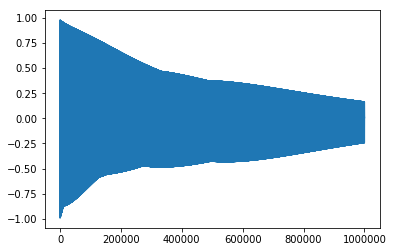

In [87]:
ff()
plt.plot(xs)

In [94]:
xs.shape

(200, 100)

In [95]:
xs[-1]

array([-0.38814344,  0.14255764,  0.08641838,  0.58305372, -0.16697184,
        0.0981127 ,  0.4049165 , -0.20253188,  0.17197042,  0.08744392,
        0.32310177,  0.58294796, -0.17835074, -0.08940382, -0.00959261,
       -0.36292511, -0.41641393,  0.44806332, -0.45115312, -0.12328354,
       -0.11252746,  0.22617289,  0.07829516,  0.00365692, -0.66235849,
       -0.36080686, -0.25245097, -0.0413093 ,  0.18549492,  0.27391926,
        0.25267533, -0.08319484,  0.032653  , -0.26002525,  0.09625344,
       -0.42680147,  0.01642957, -0.47193278,  0.01220463, -0.04301395,
        0.15286871, -0.01575488, -0.50608666,  0.21870263, -0.05299965,
        0.13755121,  0.43235302,  0.12833453,  0.12672289, -0.13010396,
       -0.01597645, -0.29322136,  0.55008237,  0.1309918 ,  0.00677021,
       -0.08587418, -0.18825136,  0.06602917,  0.11086122,  0.40976202,
       -0.23818865, -0.41994983,  0.25408803, -0.40024099,  0.59474961,
        0.09985365, -0.17029461,  0.38925923,  0.04936381, -0.15

In [66]:
model.optim.P_nis

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

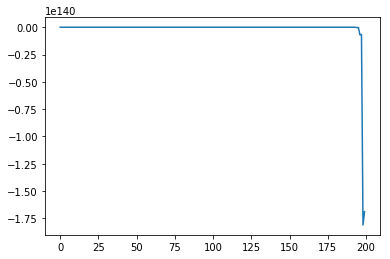

In [7]:
ff()
plt.plot(xs[:,2])

In [45]:

vs = np.random.randn(100)
W = np.random.randn(100,100) / 2

dt = 0.001

Vs = []
for i in range(10000):
    vs += dt * (-vs + W @ np.tanh(vs))
    Vs.append(np.array(vs))
    
Vs = np.concatenate(Vs,0)
Vs = Vs.reshape(100,-1)
# Vs = np.array(Vs)

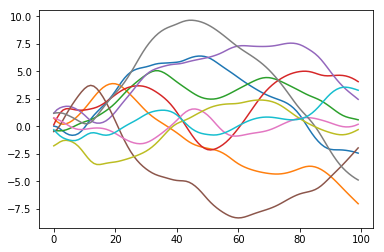

In [46]:
ff()
plt.plot(Vs[:,:10:]);

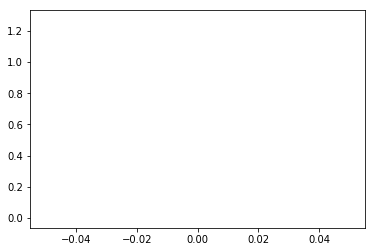

In [13]:
ff()
plt.plot(Vs[0]);
plt.plot(Vs[-1]);

In [ ]:
Vs.shape

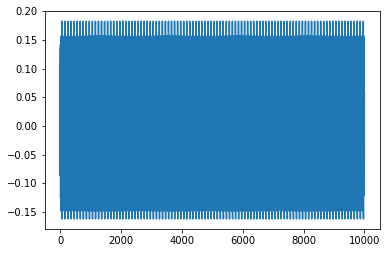

In [46]:
ff()
plt.plot(Vs[0]);

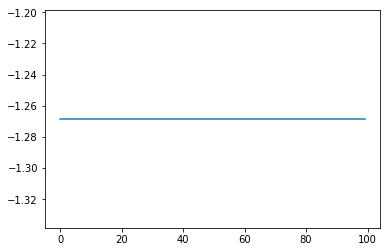

In [34]:
ff()
plt.plot(Vs[:,6])

In [35]:
vs

array([ 0.37245286,  0.39140125,  0.44641935,  0.79551295, -0.25349822,
       -0.18114541, -1.26856749, -0.91283271, -0.43440751, -0.44130438,
        0.01068899, -0.07867082,  0.88536113, -0.34165723, -0.0216271 ,
       -0.02709005, -0.55971562, -0.96193698,  0.62537809, -1.09029455,
        0.42000477, -0.36065746,  0.04193269,  0.21036185,  0.32606332,
        0.16711056,  0.40824519, -0.94857119, -0.34577645, -0.01549361,
       -0.80554468,  0.34022243, -0.06808106, -0.00975835,  0.27183961,
        0.71891353, -0.7482267 , -0.25441804, -0.25735691, -0.63723461,
       -0.17287484,  1.65240521, -0.28505318, -0.1142222 , -1.36015525,
        0.43782867, -0.46400696,  0.72359261, -0.37081609,  0.70514315,
       -0.18682831,  0.31762471,  0.43884483, -0.86815625,  0.61455927,
        0.08411614,  1.02347434,  0.61927532, -0.13869904, -0.71945202,
        0.27869377, -0.04396563,  0.23513719, -0.52938953, -0.18815147,
        0.12208103,  0.10546928, -0.20679982,  0.23637189,  0.59

In [40]:
np.concatenate([[1,2],[3,4]],0)

array([1, 2, 3, 4])

In [41]:
dt * (-vs + W @ np.tanh(vs))

array([-1.76535384e-05,  1.79697660e-06, -3.38402479e-05,  5.49850415e-05,
        6.61298420e-06,  6.96324560e-06,  2.54949095e-06,  8.51616123e-07,
       -6.02253457e-06, -1.00168641e-05,  1.45671187e-05,  7.37178675e-06,
       -8.43517551e-06, -9.58498201e-07, -3.42198291e-06,  4.08022492e-06,
        1.83833750e-05,  1.16671495e-05,  2.85185346e-05,  1.31581649e-06,
       -1.63962268e-05, -2.10969340e-06, -3.42353002e-06, -6.10251376e-06,
       -3.12514545e-05, -2.77074730e-05, -9.52898018e-06, -7.74010356e-06,
       -1.78851487e-05, -4.31088780e-06, -2.04016599e-05,  4.20222388e-06,
        5.43207010e-06, -3.18368735e-05, -1.11248783e-05,  2.28592431e-05,
        1.64174769e-05, -5.57456502e-07,  3.14603007e-06,  1.19156509e-05,
       -4.43775049e-05, -1.30085911e-05, -7.18481835e-06, -7.40444751e-06,
        2.08379818e-05,  8.43352788e-06,  1.51601848e-05,  4.48469804e-06,
       -1.83208044e-05, -4.82603929e-06,  4.08342431e-05, -1.47477573e-06,
        2.69483801e-05,  

In [142]:
P = np.eye(100)/5

L = 1
for i in range(10):
    r = np.random.randn(100)
    P = P/L - (P@r) @ (r@P) / (L + r@P@r) / L

In [143]:
P

array([[2.92308757e+17, 2.92308757e+17, 2.92308757e+17, ...,
        2.92308757e+17, 2.92308757e+17, 2.92308757e+17],
       [2.92308757e+17, 2.92308757e+17, 2.92308757e+17, ...,
        2.92308757e+17, 2.92308757e+17, 2.92308757e+17],
       [2.92308757e+17, 2.92308757e+17, 2.92308757e+17, ...,
        2.92308757e+17, 2.92308757e+17, 2.92308757e+17],
       ...,
       [2.92308757e+17, 2.92308757e+17, 2.92308757e+17, ...,
        2.92308757e+17, 2.92308757e+17, 2.92308757e+17],
       [2.92308757e+17, 2.92308757e+17, 2.92308757e+17, ...,
        2.92308757e+17, 2.92308757e+17, 2.92308757e+17],
       [2.92308757e+17, 2.92308757e+17, 2.92308757e+17, ...,
        2.92308757e+17, 2.92308757e+17, 2.92308757e+17]])

In [138]:
n = 100

np.linalg.inv(n * np.ones((100,100)))

LinAlgError: Singular matrix